### Import libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

### let`s load data and preprocess it

In [3]:
df = pd.read_csv('backloggd_games.csv')

In [4]:
df.head(10)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],Minecraft focuses on allowing the player to ex...,"['Windows PC', 'Mac', 'Linux']","['Adventure', 'Simulator']",4.3,38K,2.1K,1.3K,265,2.6K,2.7K
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",A turn-based surreal horror RPG in which a chi...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.1,8.7K,1.2K,5.3K,4.3K,1.8K,1.4K
7,7,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",['Nintendo'],The Legend of Zelda: Tears of the Kingdom is t...,['Nintendo Switch'],['Adventure'],4.6,4.3K,4.6K,3K,5.2K,1.9K,1.1K
8,8,Resident Evil 4,"Mar 24, 2023","['Capcom', 'Capcom Development Division 1']",Resident Evil 4 is a remake of the 2005 origin...,"['Windows PC', 'PlayStation 4', 'PlayStation 5...","['Adventure', 'Puzzle', 'Shooter']",4.6,6.1K,908,2.1K,3.5K,1.9K,1.4K
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']","NieR: Automata tells the story of androids 2B,...","['Windows PC', 'PlayStation 4']","['Brawler', 'RPG']",4.3,20K,1.3K,7.2K,4K,3.2K,1.4K


Title - Title of the game

Release_Date - Release date of the game

Developers - Companies/Developers of the game

Summary - Summary of the game

Platforms - Platforms of the game

Genres - Game genres

Rating - Rating of the game from 0 to 5

Plays - Number of plays that the game has

Playing - Number of people playing the game

Backlogs - Number of people who own the game but haven't played it

Wishlist - Number of times the game has been wishlisted

Lists - Number of times the game has been mentioned in a game list

Reviews - Number of user reviews about the game

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [6]:
df.describe()

,Unnamed: 0,Rating
count,60000.000000,25405.000000
mean,29999.500000,3.033171
std,17320.652413,0.735573
min,0.000000,0.300000
25%,14999.750000,2.600000
50%,29999.500000,3.100000
75%,44999.250000,3.500000
max,59999.000000,5.000000


## as we have some NaN values in rating, we should drop these rows

In [7]:
df = df.dropna()

In [8]:
def get_rid_k(val):
    val = val.replace('K', '')
    val = float(val)
    val = int(val)
    return val * 1000

In [9]:
df['Plays'] = df['Plays'].apply(get_rid_k)
df['Playing'] = df['Playing'].apply(get_rid_k)
df['Backlogs'] = df['Backlogs'].apply(get_rid_k)
df['Wishlist'] = df['Wishlist'].apply(get_rid_k)
df['Reviews'] = df['Reviews'].apply(get_rid_k)
df['Lists'] = df['Lists'].apply(get_rid_k)

In [10]:
df.describe()

,Unnamed: 0,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
count,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000
mean,23740.563485,3.033519,99281.762832,12496.834805,65834.764727,43685.375590,52103.302286,24646.586831
std,18000.371545,0.732451,176013.758288,56398.106809,141411.331626,110289.526596,117763.257137,78574.312815
min,0.000000,0.300000,1000.000000,-1000.000000,-1000.000000,0.000000,0.000000,0.000000
25%,6549.000000,2.600000,8000.000000,0.000000,3000.000000,2000.000000,4000.000000,1000.000000
50%,20754.000000,3.100000,22000.000000,1000.000000,12000.000000,6000.000000,11000.000000,3000.000000
75%,38855.000000,3.500000,94000.000000,3000.000000,52000.000000,29000.000000,41000.000000,12000.000000
max,59999.000000,5.000000,999000.000000,999000.000000,998000.000000,999000.000000,999000.000000,988000.000000


## let's check the theory that the PC is the main platform on which the game's rating depends. Let's create a new column with 1 - game is available on pc 0 - game is not available on pc.

In [11]:
def windows_check(platforms):
    if 'Windows PC' in platforms:
        return 1
    else:
        return 0
df['PC'] = df['Platforms'].apply(windows_check)

Text(0, 0.5, 'value counts')

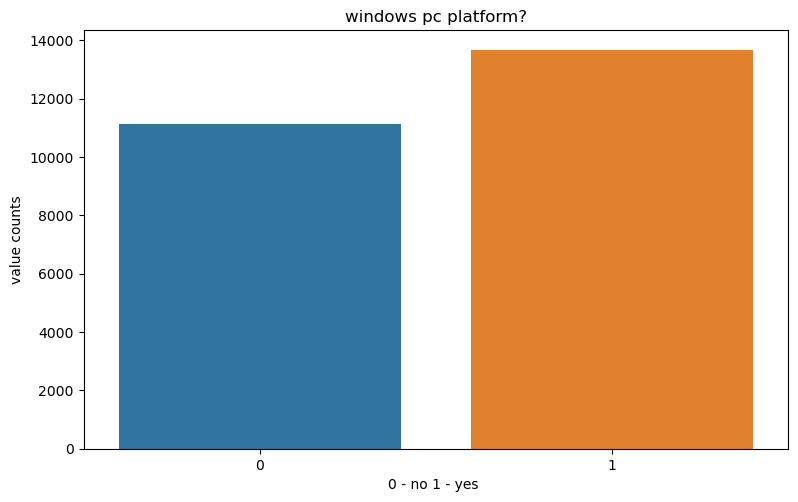

In [12]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('windows pc platform?')
sns.countplot(x = 'PC', palette = 'tab10', data = df)
plt.xlabel('0 - no 1 - yes ')
plt.ylabel('value counts')

## let`s check corr between features 

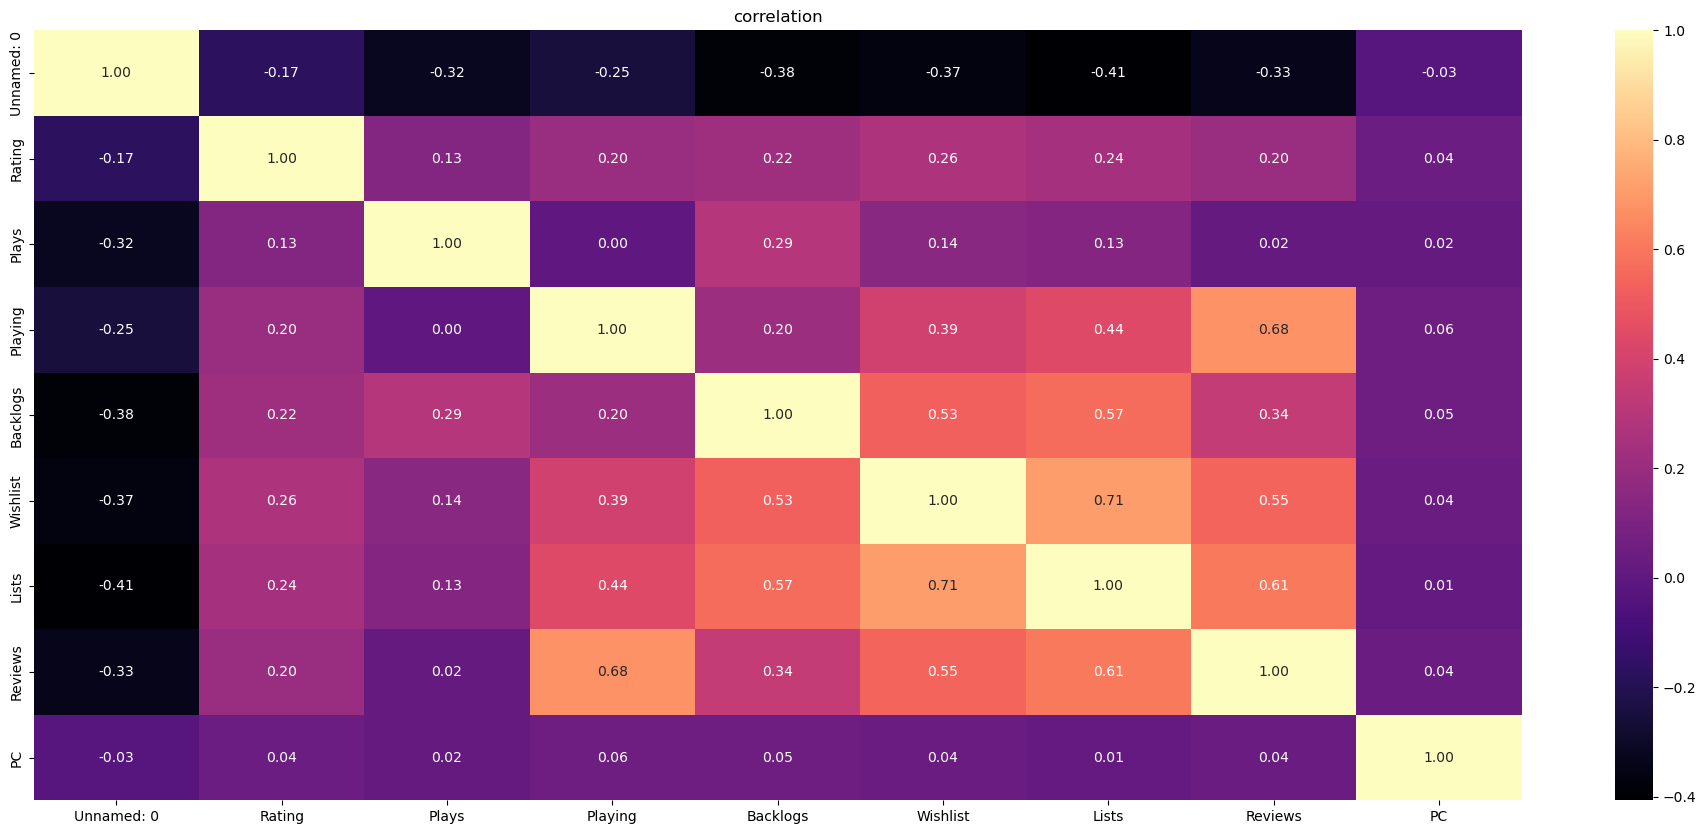

In [13]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('correlation')
plt.show()

where we can see intresting corr

list // wishlist

list // reviews

list // backlogs

playing // reviews

playing // wishlist

plays // backlogs

backlogs // wishlist

wishlist // reviews

rating // wishlist

### list // wishlist

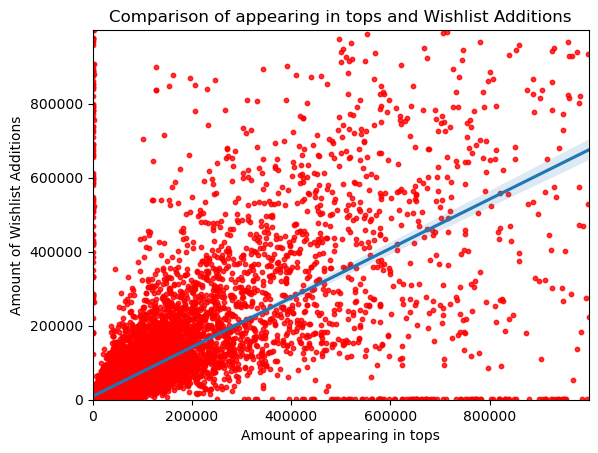

In [14]:
sns.regplot(x='Lists', y='Wishlist', data=df, scatter_kws={'s': 10, 'color': 'red'})
plt.xlabel('Amount of appearing in tops')
plt.ylabel('Amount of Wishlist Additions')
plt.title('Comparison of appearing in tops and Wishlist Additions')
plt.xlim(df['Lists'].min(), df['Lists'].max())
plt.ylim(df['Wishlist'].min(), df['Wishlist'].max())
plt.show()

There's a clear pattern to how adding to a Wishlist guarantees a game will make it to the top. Why such an order, and not the other way around, first in the top then in the Wishlist. 
Because as a rule, games are added to the Wishlist before their release, and the top adds after the release.

### list // reviews

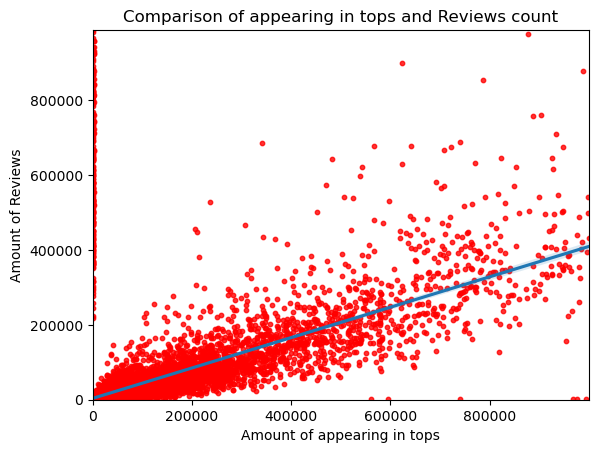

In [15]:
sns.regplot(x='Lists', y='Reviews', data=df, scatter_kws={'s': 10, 'color': 'red'})
plt.xlabel('Amount of appearing in tops')
plt.ylabel('Amount of Reviews')
plt.title('Comparison of appearing in tops and Reviews count')
plt.xlim(df['Lists'].min(), df['Lists'].max())
plt.ylim(df['Reviews'].min(), df['Reviews'].max())
plt.show()

Since reviews of games are written more often than added to the Wishlist, and besides, reviews are not always positive. This dependence is less than Lists // Wishlists

### list // backlogs

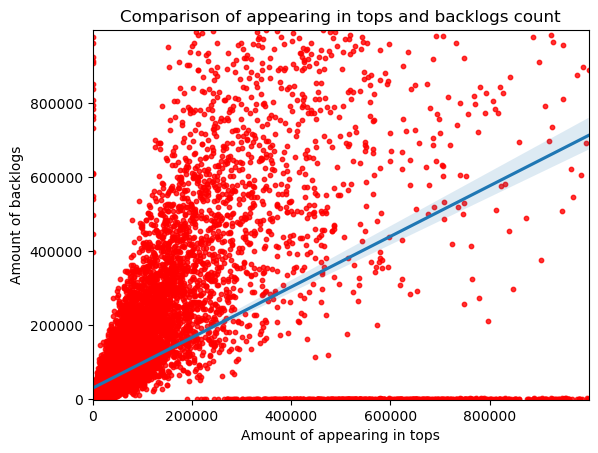

In [16]:
sns.regplot(x='Lists', y='Backlogs', data=df, scatter_kws={'s': 10, 'color': 'red'})
plt.xlabel('Amount of appearing in tops')
plt.ylabel('Amount of backlogs')
plt.title('Comparison of appearing in tops and backlogs count')
plt.xlim(df['Lists'].min(), df['Lists'].max())
plt.ylim(df['Backlogs'].min(), df['Backlogs'].max())
plt.show()

We have an addiction to the fact that a person bought a game and never played it and the fact that the game is in some ratings. 
The first thing that comes to mind is that people buy these games on sale because they are famous games that they have heard of. To test this hypothesis you need to understand when the game was purchased. 


### playing // reviews 

### playing // wishlist

There's an obvious correlation, the more reviews, the more players. the more addition to wishlist, the more players.

### plays // backlogs



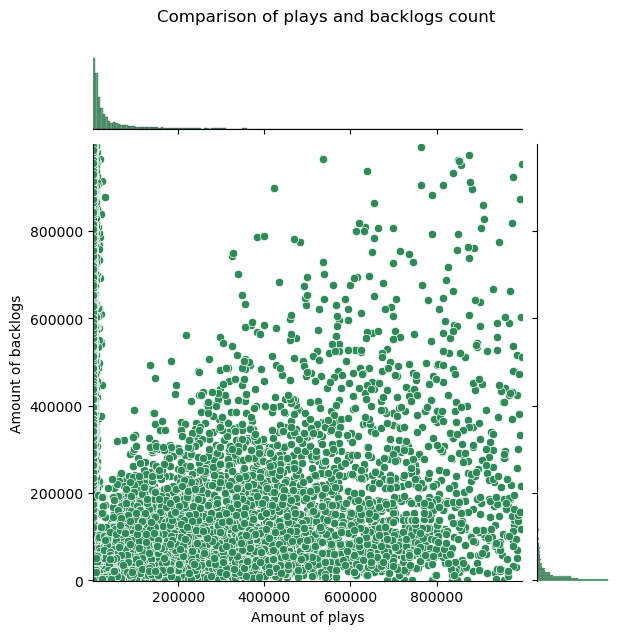

In [17]:
jointplot = sns.jointplot(x='Plays', y='Backlogs', data=df, color='seagreen')
jointplot.fig.suptitle('Comparison of plays and backlogs count', y=1.05)
plt.xlabel('Amount of plays')
plt.ylabel('Amount of backlogs')
plt.xlim(df['Plays'].min(), df['Plays'].max())
plt.ylim(df['Backlogs'].min(), df['Backlogs'].max())
plt.show()


Logically, the more players, the more popular the game, the more those who will buy the game and never play it.
The reasons why a game is bought and not played can be many.


### backlogs // wishlist

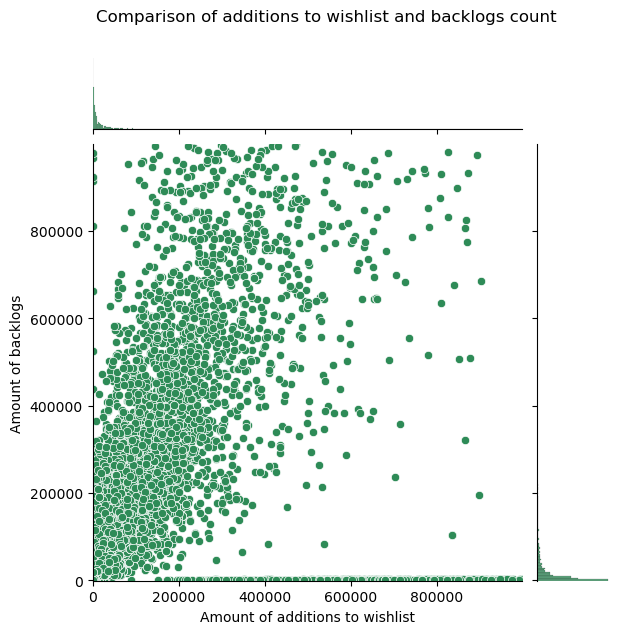

In [18]:
jointplot = sns.jointplot(x='Wishlist', y='Backlogs', data=df, color='seagreen')
jointplot.fig.suptitle('Comparison of additions to wishlist and backlogs count', y=1.05)
plt.xlabel('Amount of additions to wishlist')
plt.ylabel('Amount of backlogs')
plt.xlim(df['Wishlist'].min(), df['Wishlist'].max())
plt.ylim(df['Backlogs'].min(), df['Backlogs'].max())
plt.show()

I would explain the correlation between backlogs and wishlist by the fact that those who add a game to wishlist wait for it for a long time, then buy it and don't play it, because the interest is not the same when you were waiting for the game. 

### wishlist // reviews
Again, the banal and logical correlation is that there are more reviews where there are more players, and where there are more players there are more additions to the Wishlist.

### rating // wishlist

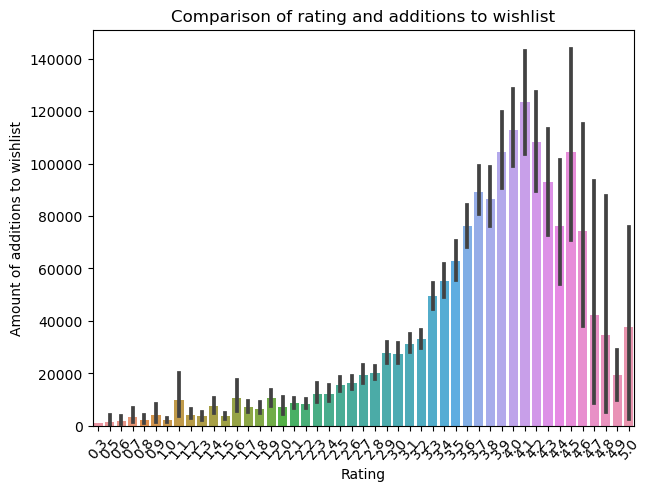

In [19]:
sns.barplot(x='Rating', y='Wishlist', data=df)
plt.xlabel('Rating')
plt.ylabel('Amount of additions to wishlist')
plt.title('Comparison of rating and additions to wishlist')
plt.xticks(rotation=50)
plt.tight_layout(pad=0.3)
plt.show()

While there is a slight correlation between rating and being added to the Wishlist, it confuses me that there is a big jump on the 4.5 rating. Why 4.5 is an important rating, because it is the borderline between 4 and 5, which is very important for the consumer to know whether to play a game with a rating of 4 or 5. 
So, if there was a direct correlation, all the additions to the Wishlist would be at a score of 5, however, most of the additions to the Wishlist are at a score lower than 4.5. 
This is more likely due to the fact that games with a rating of 5 are incredibly few, while games with a rating of 3.7-4.4 are in the majority. 


### lets make models and predict game rating 

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 


In [21]:
df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,PC
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4000,5000,5000,4000,3000,1
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,3000,5000,3000,5000,3000,0
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,3000,7000,4000,3000,2000,1
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,2000,9000,2000,3000,2000,1
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728000,5000,2000,3000,2000,1


In [22]:
X = df[['Plays','Playing','Backlogs','Wishlist','Lists','Reviews','PC']] 
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=102)

### Let's start with a Linear regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
Linear = LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [25]:
Linear_predict = Linear.predict(X_test)

### make table with result

In [26]:
mse_lr = mean_squared_error(y_test, Linear_predict)
mae_lr = mean_absolute_error(y_test, Linear_predict)
r2_lr = r2_score(y_test, Linear_predict)

results_lr = pd.DataFrame(
    [['Linear', mse_lr, mae_lr, r2_lr]],
    columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared']
)

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. It gives higher weights to larger errors, making it useful for penalizing outliers. A lower MSE indicates better model performance, with zero being the best possible score.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. Unlike MSE, MAE does not square the errors, which means it gives equal weight to all errors. A lower MAE indicates better model performance, with zero being the best possible score.

R-squared (R^2): R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that can be explained by the independent variables (features) in the model. It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates that the model perfectly explains the variance. A higher R-squared value indicates better model performance.

### KNN 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [29]:
mse_knn = mean_squared_error(y_test, knn_predict)
mae_knn = mean_absolute_error(y_test, knn_predict)
r2_knn = r2_score(y_test, knn_predict)

results_knn = pd.DataFrame(
    [['KNN', mse_knn, mae_knn, r2_knn]],
    columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared']
)

### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
random_forest = RandomForestRegressor().fit(X_train,y_train)
forest_predict = random_forest.predict(X_test)

In [32]:
mse_forest = mean_squared_error(y_test, forest_predict)
mae_forest = mean_absolute_error(y_test, forest_predict)
r2_forest = r2_score(y_test, forest_predict)

results_forest = pd.DataFrame(
    [['Random Forest', mse_forest, mae_forest, r2_forest]],
    columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared']
)

### lets compare our models

In [33]:
results_lr

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear,0.490742,0.550206,0.086461


In [34]:
results_knn

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,KNN,0.46646,0.516264,0.131662


In [35]:
results_forest

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Random Forest,0.356924,0.425941,0.335568


### Here is the end of my little project, hope you enjoyed it. Since I'm a beginner, I'm open to criticism and ready to receive your advice :) 